<a href="https://colab.research.google.com/github/ugurursavas/spatial_inequalities_turkiye/blob/main/Classical_and_Spatial_Markov_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load libraries

In [ ]:
!pip install mapclassify
!pip install pysal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

import geopandas as gpd
import mapclassify as mc
import libpysal
from esda.moran import Moran
import giddy

import statsmodels.api as stats

from spreg import ML_Lag
from spreg import ML_Error

## The dataset

In [ ]:
df_gdppc = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Project2025a/data/wide_income_pc_data_3.xlsx')
df_gdppc

,asdf_id,shapeName,province,provinceID,subregion,subregionID,region,regionID,gdppc_2004,gdppc_2005,...,gdppc_2014,gdppc_2015,gdppc_2016,gdppc_2017,gdppc_2018,gdppc_2019,gdppc_2020,gdppc_2021,gdppc_2022,gdppc_2023
0,0,Adana,Adana,TR621,Adana Subregion,TR62,Mediterranean Region,TR6,8832.407563,9562.814706,...,13171.396314,13877.767024,14435.589802,14946.317915,14815.580204,14956.374166,15810.963122,17545.489851,18747.219787,20049.204113
1,1,Adiyaman,AdÄ±yaman,TRC12,Gaziantep Subregion,TRC1,Southeast Anatolia Region,TRC,5356.319041,5763.895263,...,8010.685223,8503.908596,8609.806318,8988.842029,9215.684862,9292.833598,9871.413009,10472.984175,11180.636964,12994.522115
2,2,Afyonkarahisar,Afyonkarahisar,TR332,Manisa Subregion,TR33,Aegean Region,TR3,8153.361484,8590.860444,...,12730.464586,13244.313590,13931.617317,15223.499461,15264.136511,14922.779558,15030.093145,15564.626253,16125.684398,16669.864935
3,3,Agri,AÄŸrÄ±,TRA21,Ağrı Subregion,TRA2,Northeast Anatolia Region,TRA,4187.383973,4435.445569,...,5524.034690,5817.799382,6527.340458,6563.299365,6673.627878,6787.884722,7363.297132,7682.336975,8429.087042,9370.543661
4,4,Amasya,Amasya,TR834,Samsun Subregion,TR83,West Black Sea Region,TR8,8758.649929,9512.284589,...,12813.235253,14000.332126,14521.723543,15010.118586,14681.809024,14661.065719,15070.224803,15114.448112,16090.112249,16333.788866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,Yalova,Yalova,TR425,Kocaeli Subregion,TR42,East Marmara Region,TR4,13472.822645,13953.390273,...,19866.078918,21652.936153,21839.877516,22126.901351,22634.490569,22475.573483,23494.033690,27038.776499,26753.193198,28692.302645
77,77,Yozgat,Yozgat,TR723,Kayseri Subregion,TR72,Central Anatolia Region,TR7,7025.510201,7519.732368,...,11430.562234,12017.072764,12480.012635,12324.590947,12459.947621,11982.205603,13098.397738,12818.537634,13752.625214,14380.267127
78,78,Zonguldak,Zonguldak,TR811,Zonguldak Subregion,TR81,West Black Sea Region,TR8,7767.372074,8528.685234,...,12651.585849,13177.270950,13149.314505,13975.439443,13504.482256,12416.632414,13601.249315,15010.549718,15855.171535,14686.616218
79,79,Sirnak,ÅÄ±rnak,TRC33,Mardin Subregion,TRC3,Southeast Anatolia Region,TRC,5803.207153,6058.602193,...,8891.714352,9069.779919,8895.460408,10522.474545,10842.248040,11132.955071,11912.868518,13002.109446,12911.824679,14993.943004


In [ ]:
## Reshape dataset
# Transform to wide format for 'variable_a' only
#df_gdppc = df_long.pivot_table(index=['asdf_id', 'shapeName'], columns='year', values='gdp_pc')

# Reset the index to make 'id' a regular column
#df_gdppc = df_gdppc.reset_index()

# Remove the 'year' column name from the columns index (this is crucial for clean year names)
#df_gdppc.columns.name = None

#df_gdppc

In [ ]:
df_gdppc.shape

(81, 28)

In [ ]:
# Build list of the target column names
years = [f"gdppc_{year}" for year in range(2004, 2024)]

# Select those columns explicitly
pci = df_gdppc.loc[:, years].values.T
pci

array([[ 8832.40756305,  5356.31904052,  8153.36148403, ...,
         7767.37207379,  5803.207153  ,  5430.76570835],
       [ 9562.814706  ,  5763.89526299,  8590.86044363, ...,
         8528.68523372,  6058.60219325,  5571.75380771],
       [10014.88208656,  6063.70041252,  9152.00175928, ...,
         9286.89221683,  6386.6564217 ,  5733.04970602],
       ...,
       [17545.48985077, 10472.98417459, 15564.62625255, ...,
        15010.54971815, 13002.10944604,  8192.42050937],
       [18747.21978659, 11180.63696434, 16125.6843978 , ...,
        15855.17153489, 12911.82467876,  9081.06317191],
       [20049.20411329, 12994.52211485, 16669.86493537, ...,
        14686.61621797, 14993.94300432,  9466.15075945]])

In [ ]:
pci.shape

(20, 81)

So, in this transposed matrix the rows indicate the years and the colums (17 years) the provinces (17 provinces). The first row of the matrix/array is the per capita incomes for the 81 Turkish provinces for the year 2007:

In [ ]:
pci[0, :]

array([ 8832.40756305,  5356.31904052,  8153.36148403,  4187.38397274,
        8758.64992936, 16701.27575203, 10731.76217619, 10515.3183584 ,
       11377.75908707, 18649.50999691,  7185.23514134,  5914.49746201,
        8436.05829911,  6040.92971529,  7014.47652988, 14024.29864476,
        5105.69911458,  4521.1901953 , 15066.90923685, 11576.27530508,
       14905.75785857, 12542.50076082,  9446.53605353,  8267.53261308,
       12749.40565421,  6657.67730412, 10723.7944836 , 11298.56950132,
        7688.40323665, 10463.65850119,  7061.08243458, 13840.89655439,
        8203.47445006,  7423.40306177,  8995.08445485,  5685.05044482,
        7983.3169976 ,  5704.96960697, 10761.49814674, 21402.30594558,
       15118.48469419,  7972.21080797,  9505.24450401, 12053.3915737 ,
        5426.66485337,  9953.29727254, 11556.4377813 ,  6093.48081921,
        8481.96529183, 14155.54741428,  8318.15437029, 19756.32734575,
        8844.70090769,  9247.93111162,  7205.3719453 , 10881.52571048,
      

## Plot absolute dynamics

In [ ]:
years = range(2004,2024)
names = df_gdppc['shapeName'].values
order2004 = np.argsort(pci[0,:])
order2023 = np.argsort(pci[-1,:])
names2004 = names[order2004[::-1]]
names2023 = names[order2023[::-1]]
first_last = np.vstack((names2004,names2023))

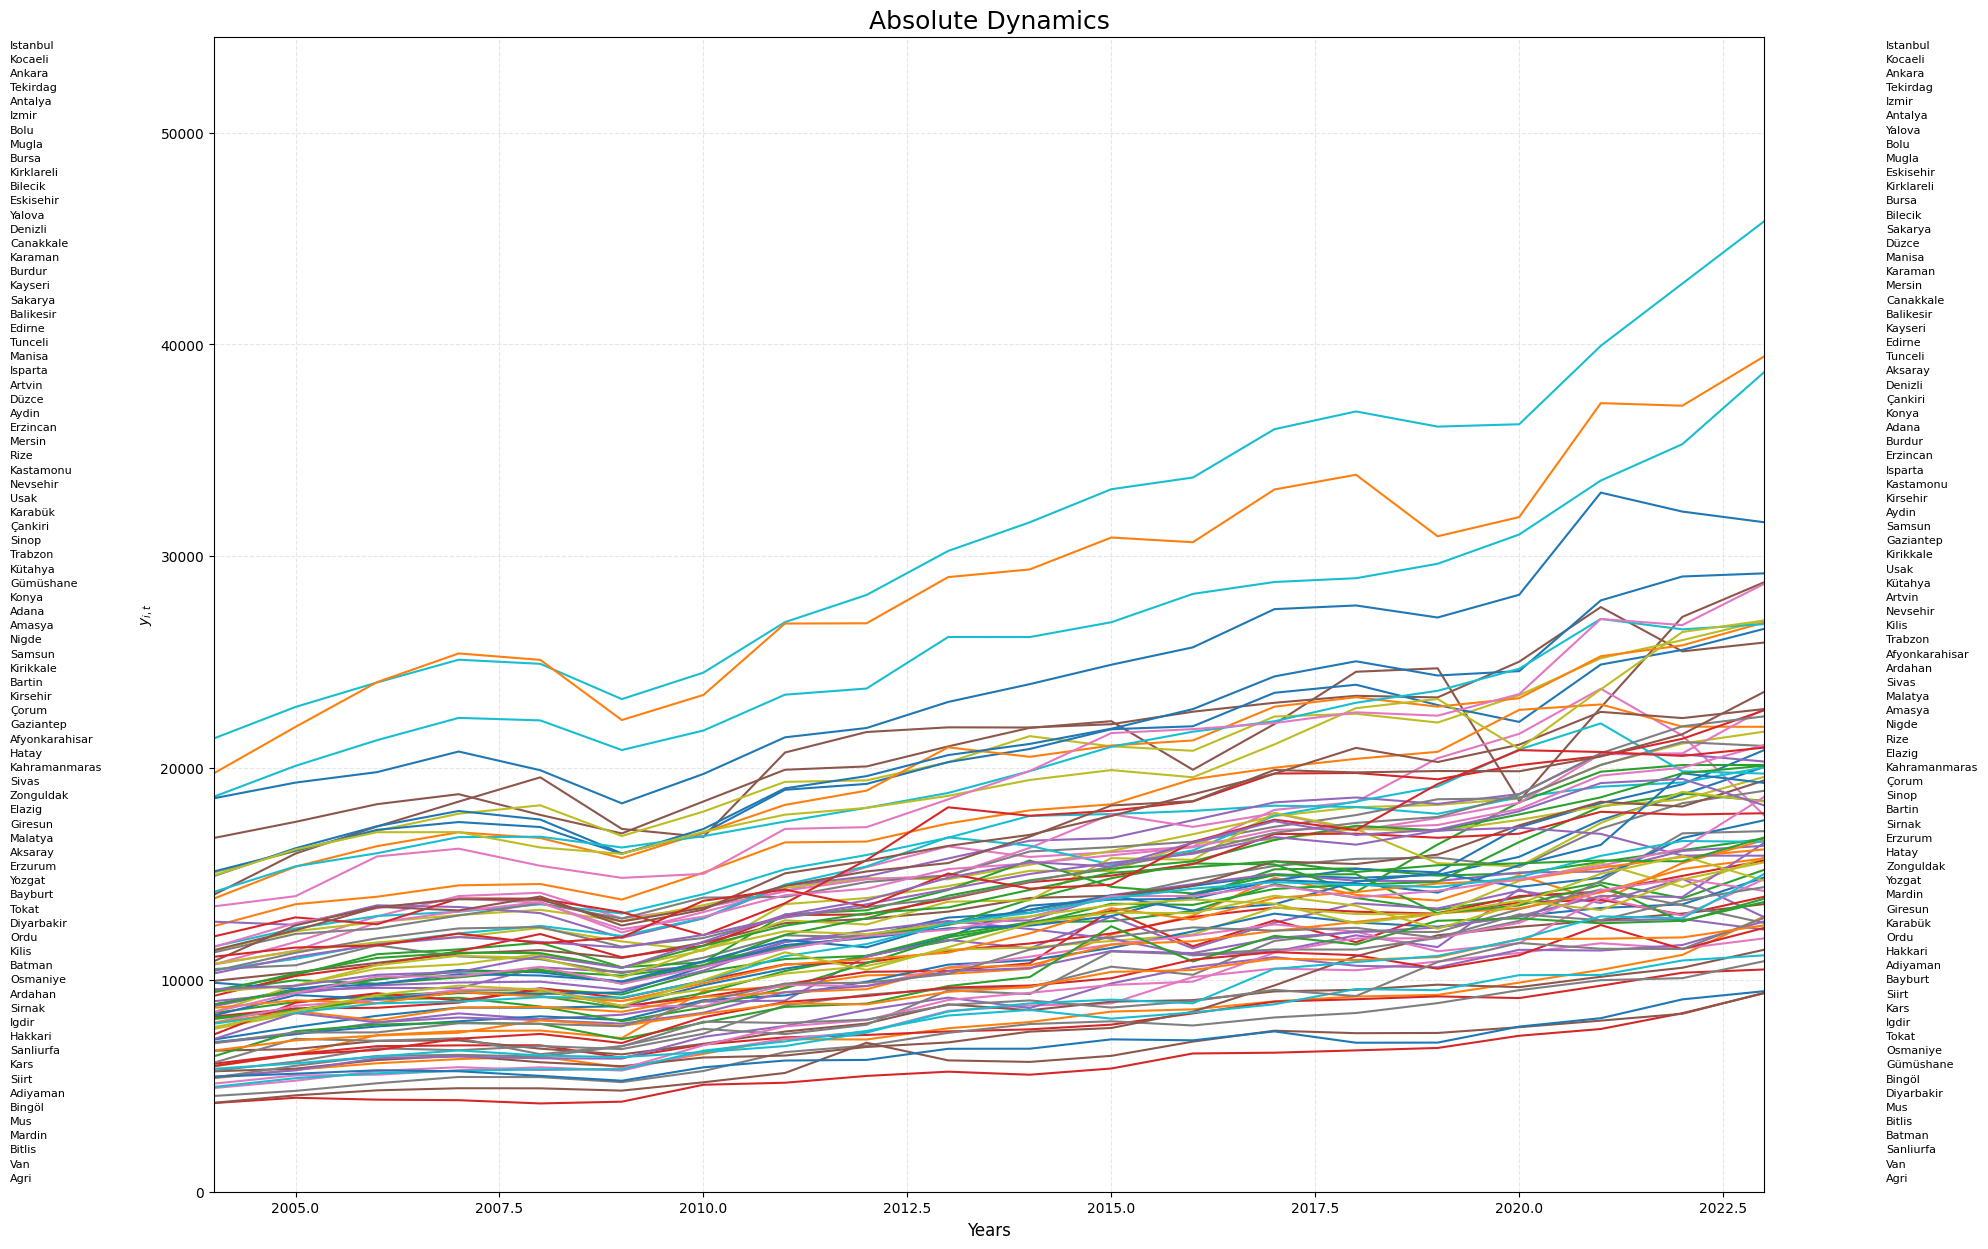

In [ ]:
rcParams['figure.figsize'] = 20, 15
plt.plot(years, pci)

# Better vertical spacing
y_positions = np.linspace(54000, 500, 81)
for i in range(81):
    plt.text(2001.5, y_positions[i], first_last[0][i], fontsize=8)
    plt.text(2024.5, y_positions[i], first_last[1][i], fontsize=8)

plt.xlim((years[0], years[-1]))
plt.ylim((0, 54530))
plt.ylabel(r"$y_{i,t}$", fontsize=10)
plt.xlabel('Years', fontsize=12)
plt.title('Absolute Dynamics', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.3)

## Plot relative dynamics

In [ ]:
rpci= (pci.T / pci.mean(axis=1)).T

order2004 = np.argsort(rpci[0,:])
order2023 = np.argsort(rpci[-1,:])
names2004 = names[order2004[::-1]]
names2023 = names[order2023[::-1]]
first_last = np.vstack((names2004,names2023))

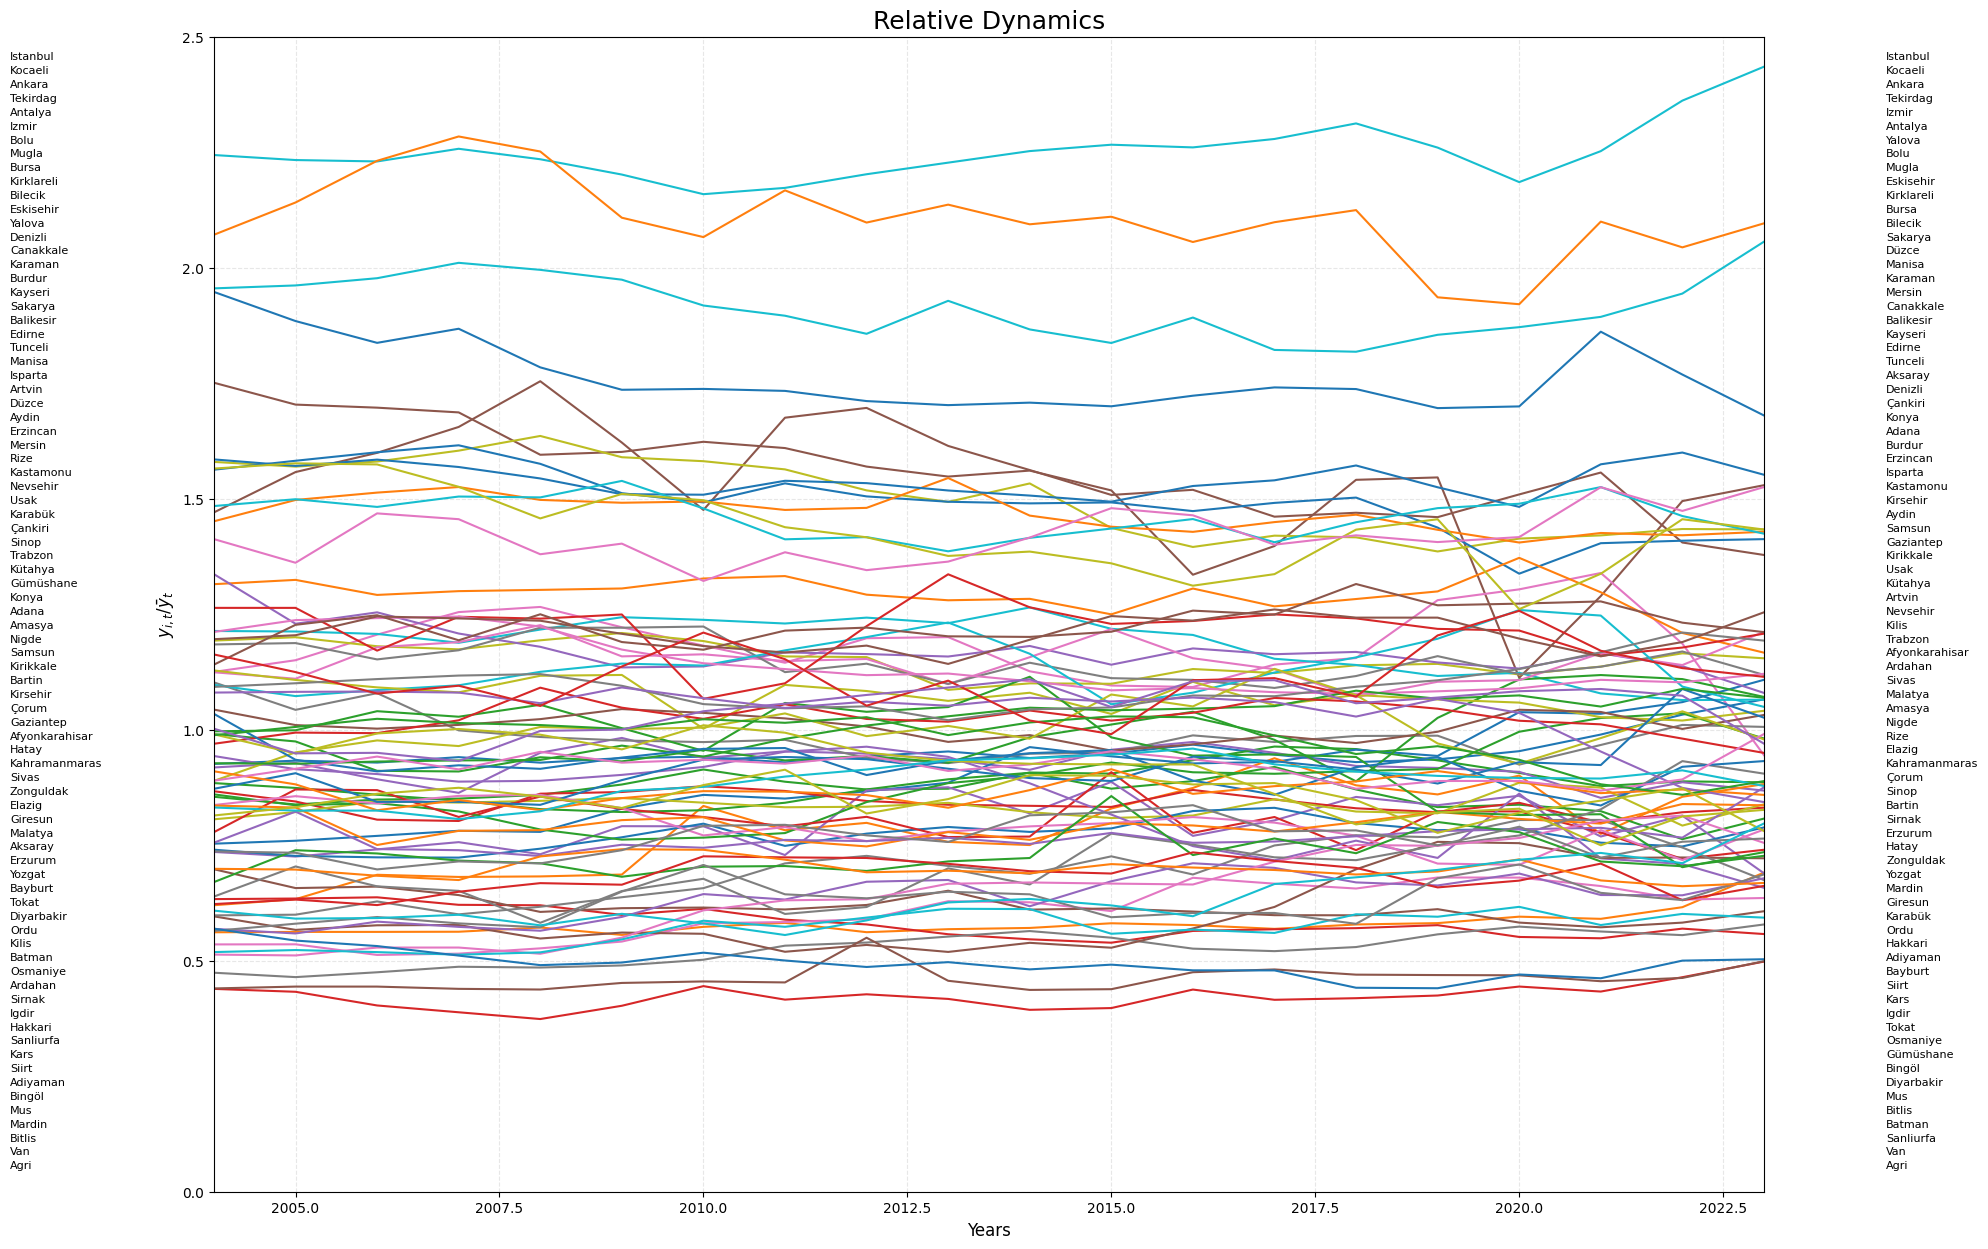

In [ ]:
rcParams['figure.figsize'] = 20, 15
plt.plot(years, rpci)

# Dynamic vertical spacing
y_positions = np.linspace(2.45, 0.05, 81)
for i in range(81):
    plt.text(2001.5, y_positions[i], first_last[0][i], fontsize=8)
    plt.text(2024.5, y_positions[i], first_last[1][i], fontsize=8)

plt.xlim((years[0], years[-1]))
plt.ylim((0, 2.5))
plt.ylabel(r"$y_{i,t}/\bar{y}_t$", fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.title('Relative Dynamics', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.3)

## Panel data of quintile membership

Let's consider the per-capita income in 2004 for all the 81 provinces

In [ ]:
# slice first raw and all columns
pci[0, :]

array([ 8832.40756305,  5356.31904052,  8153.36148403,  4187.38397274,
        8758.64992936, 16701.27575203, 10731.76217619, 10515.3183584 ,
       11377.75908707, 18649.50999691,  7185.23514134,  5914.49746201,
        8436.05829911,  6040.92971529,  7014.47652988, 14024.29864476,
        5105.69911458,  4521.1901953 , 15066.90923685, 11576.27530508,
       14905.75785857, 12542.50076082,  9446.53605353,  8267.53261308,
       12749.40565421,  6657.67730412, 10723.7944836 , 11298.56950132,
        7688.40323665, 10463.65850119,  7061.08243458, 13840.89655439,
        8203.47445006,  7423.40306177,  8995.08445485,  5685.05044482,
        7983.3169976 ,  5704.96960697, 10761.49814674, 21402.30594558,
       15118.48469419,  7972.21080797,  9505.24450401, 12053.3915737 ,
        5426.66485337,  9953.29727254, 11556.4377813 ,  6093.48081921,
        8481.96529183, 14155.54741428,  8318.15437029, 19756.32734575,
        8844.70090769,  9247.93111162,  7205.3719453 , 10881.52571048,
      

Let's classify all the states for all years into five groups (the quantiles)

In [ ]:
q5 = np.array([mc.Quantiles(y, k=5).yb for y in pci]).transpose() # We need to transpose the results to be used later

This classication for the first year

In [ ]:
# cross-section of quintile membership in the first year (2004)
q5[:, 0]

array([2, 0, 1, 0, 2, 4, 3, 3, 3, 4, 1, 0, 2, 0, 1, 4, 0, 0, 4, 3, 4, 4,
       2, 2, 4, 1, 3, 3, 1, 3, 1, 4, 1, 1, 2, 0, 1, 0, 3, 4, 4, 1, 2, 4,
       0, 3, 3, 0, 2, 4, 2, 4, 2, 2, 1, 3, 0, 3, 4, 0, 3, 2, 1, 0, 3, 3,
       2, 0, 2, 1, 4, 1, 2, 3, 2, 0, 4, 1, 1, 0, 0])

Note the following:

- We are relying on the classification methods in mapclassify for defining our quintiles.
- The class Quantiles uses quintiles (k=5) as the default and will create an instance of this class that has multiple attributes, the one we are extracting in the first line is $y^b$ - the class id for each observation.
- The second thing to note is the transpose operator which gets our resulting array q5 in the proper structure required for use of Markov. Thus, we see that the first spatial unit (Adana with an income of 8832.40756305) fell in the third quintile in 2004.

The panel data of the absolute dynamics of quintile membership is:

In [ ]:
# Rows indicate regional units and columns indicate years
pd.DataFrame(q5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
77,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
78,1,1,2,2,2,1,2,2,1,1,2,1,1,1,1,1,1,2,2,1
79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


## Classic Markov

To summarize the transition dynamics for all units, we instantiate a Markov object:

In [ ]:
m5 = giddy.markov.Markov(q5)

The Markov Chain is irreducible and is composed by:
1 Recurrent class (indices):
[0 1 2 3 4]
0 Transient classes.
The Markov Chain has 0 absorbing states.


The number of transitions between any two quintile classes could be counted:

In [ ]:
print(m5.transitions)

[[300.  23.   0.   0.   0.]
 [ 23. 250.  31.   0.   0.]
 [  0.  31. 249.  24.   0.]
 [  0.   0.  24. 257.  23.]
 [  0.   0.   0.  23. 281.]]


By assuming the first-order Markov property, time homogeneity, spatial homogeneity and spatial independence, a transition probability matrix could be estimated which holds for all the 81 Turkish provinces across 2004-2023:

In [ ]:
print(m5.p)

[[0.92879257 0.07120743 0.         0.         0.        ]
 [0.07565789 0.82236842 0.10197368 0.         0.        ]
 [0.         0.10197368 0.81907895 0.07894737 0.        ]
 [0.         0.         0.07894737 0.84539474 0.07565789]
 [0.         0.         0.         0.07565789 0.92434211]]


The fact that each of the 5 diagonal elements is larger than
0.81 indicates a high stability of Turkish provincial income dynamics system (Based on absolute values of income).

Another very important feature of a Markov chain is the steady state distribution π (also called limiting distribution) defined as πp = π. The attribute steady_state gives π as follows:

In [ ]:
print(m5.steady_state)

[0.20987654 0.19753086 0.19753086 0.19753086 0.19753086]


If the distribution at t is a steady state distribution as shown above, then any distribution afterwards is the same distribution.

With the transition probability matrix in hand, we can estimate the first mean passage time which is the average number of steps to go from a state/class to another state for the first time:

In [ ]:
print(giddy.ergodic.fmpt(m5.p))

[[  4.76470588  14.04347826  34.26928471  73.06095138 126.75660355]
 [ 52.86956522   5.0625      20.22580645  59.01747312 112.71312529]
 [ 82.28892006  29.41935484   5.0625      38.79166667  92.48731884]
 [107.62225339  54.75268817  25.33333333   5.0625      53.69565217]
 [120.83964469  67.97007948  38.55072464  13.2173913    5.0625    ]]


/tmp/ipython-input-3680033645.py:1: DeprecationWarning: fmpt is deprecated. It will be replaced in giddy 2.5 with mfpt
  print(giddy.ergodic.fmpt(m5.p))


Thus, for a state with income in the first quintile, it takes on average 14.04 years for it to first enter the second quintile, 34.27 to get to the third quintile, 73.06 years to enter the fourth, and 126.75 years to reach the richest quintile.

## Spatial dependence

Thus far we have treated all the spatial units as independent to estimate the transition probabilities. This hides an implicit assumption: the movement of a spatial unit in the income distribution is independent of the movement of its neighbors or the position of the neighbors in the distribution. But what if spatial context matters?

We could plot the choropleth maps of per capita incomes of Turkish provinces to get a first impression of the spatial distribution.

In [ ]:
geo_table = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Project2025a/data/TUR_ADM1.geojson')
complete_table = geo_table.merge(df_gdppc, on='asdf_id')
complete_table

,id,Level,asdf_id,gqid,shapeGroup,shapeID,shapeISO,shapeName_x,shapeType,geometry,...,gdppc_2014,gdppc_2015,gdppc_2016,gdppc_2017,gdppc_2018,gdppc_2019,gdppc_2020,gdppc_2021,gdppc_2022,gdppc_2023
0,0,ADM1,0,0,TUR,TUR-ADM1-80719077B77822815,TR-01,Adana,ADM1,"MULTIPOLYGON (((35.38791 36.55628, 35.38883 36...",...,13171.396314,13877.767024,14435.589802,14946.317915,14815.580204,14956.374166,15810.963122,17545.489851,18747.219787,20049.204113
1,1,ADM1,1,1,TUR,TUR-ADM1-80719077B28599679,TR-02,Adıyaman,ADM1,"POLYGON ((37.861 37.46666, 37.87451 37.46648, ...",...,8010.685223,8503.908596,8609.806318,8988.842029,9215.684862,9292.833598,9871.413009,10472.984175,11180.636964,12994.522115
2,2,ADM1,2,2,TUR,TUR-ADM1-80719077B84550223,TR-03,Afyonkarahisar,ADM1,"POLYGON ((30.48061 38.19903, 30.49275 38.19655...",...,12730.464586,13244.313590,13931.617317,15223.499461,15264.136511,14922.779558,15030.093145,15564.626253,16125.684398,16669.864935
3,3,ADM1,3,3,TUR,TUR-ADM1-80719077B65173278,TR-04,Ağrı,ADM1,"POLYGON ((43.77542 39.25004, 43.79639 39.26875...",...,5524.034690,5817.799382,6527.340458,6563.299365,6673.627878,6787.884722,7363.297132,7682.336975,8429.087042,9370.543661
4,4,ADM1,4,4,TUR,TUR-ADM1-80719077B72380009,TR-05,Amasya,ADM1,"POLYGON ((36.3878 40.66228, 36.39811 40.67508,...",...,12813.235253,14000.332126,14521.723543,15010.118586,14681.809024,14661.065719,15070.224803,15114.448112,16090.112249,16333.788866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,ADM1,76,76,TUR,TUR-ADM1-80719077B83749854,TR-77,Yalova,ADM1,"POLYGON ((29.4818 40.56397, 29.48439 40.56645,...",...,19866.078918,21652.936153,21839.877516,22126.901351,22634.490569,22475.573483,23494.033690,27038.776499,26753.193198,28692.302645
77,77,ADM1,77,77,TUR,TUR-ADM1-80719077B67647683,TR-66,Yozgat,ADM1,"POLYGON ((35.33995 40.25508, 35.28463 40.22667...",...,11430.562234,12017.072764,12480.012635,12324.590947,12459.947621,11982.205603,13098.397738,12818.537634,13752.625214,14380.267127
78,78,ADM1,78,78,TUR,TUR-ADM1-80719077B51620989,TR-67,Zonguldak,ADM1,"MULTIPOLYGON (((31.85365 41.0083, 31.88498 41....",...,12651.585849,13177.270950,13149.314505,13975.439443,13504.482256,12416.632414,13601.249315,15010.549718,15855.171535,14686.616218
79,79,ADM1,79,79,TUR,TUR-ADM1-80719077B759750,TR-73,Şırnak,ADM1,"POLYGON ((43.49919 37.74179, 43.43868 37.74784...",...,8891.714352,9069.779919,8895.460408,10522.474545,10842.248040,11132.955071,11912.868518,13002.109446,12911.824679,14993.943004


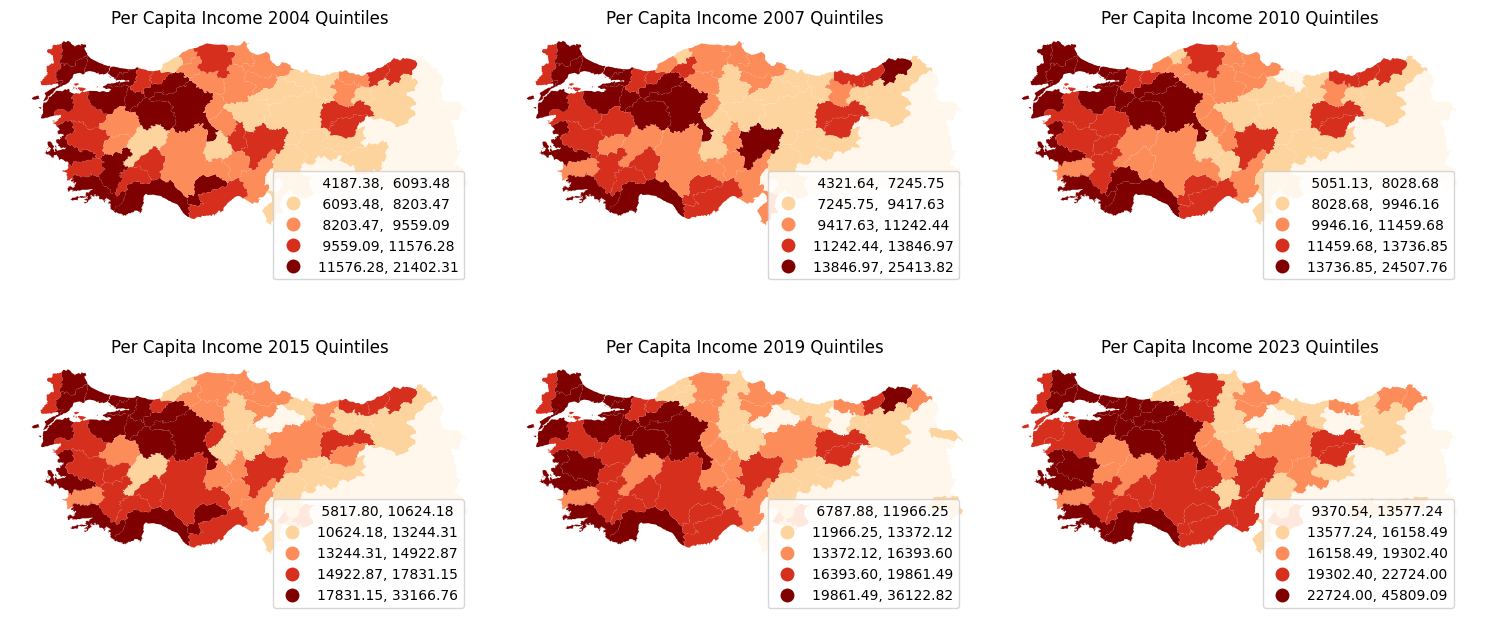

In [ ]:
# Sample 6 years evenly from 2007 to 2023
index_year = [2004, 2007, 2010, 2015, 2019, 2023]  # Feel free to change these

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

for i in range(2):
    for j in range(3):
        year = index_year[i * 3 + j] # Use integer year
        ax = axes[i, j]
        complete_table.plot(
            ax=ax,
            column=f'gdppc_{year}', # Use the correct column name format
            cmap='OrRd',
            scheme='quantiles',
            legend=True
        )
        ax.set_title(f'Per Capita Income {year} Quintiles')
        ax.axis('off')

        # Adjust legend position
        leg = ax.get_legend()
        if leg:
            leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))

plt.tight_layout()
plt.show()

In [ ]:
#from libpysal.weights import KNN

# Extract centroids as representative points
#coords = geo_table.geometry.centroid

# Build 5-Nearest Neighbors weight matrix
#w = KNN.from_dataframe(geo_table, k=5)

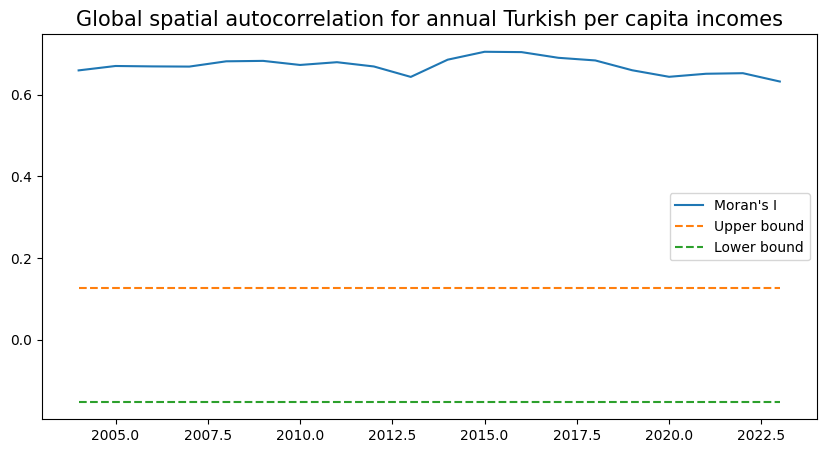

In [ ]:
w = libpysal.io.open("/content/drive/MyDrive/Colab Notebooks/Project2025a/data/TUR_ADM1.gal").read()
w.transform = 'R'

mits = [Moran(cs, w) for cs in pci]
res = np.array([(mi.I, mi.EI, mi.seI_norm, mi.sim[974]) for mi in mits])
years = np.arange(2004,2024)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (10,5) )
ax.plot(years, res[:,0], label='Moran\'s I')
#plot(years, res[:,1], label='E[I]')
ax.plot(years, res[:,1]+1.96*res[:,2], label='Upper bound',linestyle='dashed')
ax.plot(years, res[:,1]-1.96*res[:,2], label='Lower bound',linestyle='dashed')
ax.set_title("Global spatial autocorrelation for annual Turkish per capita incomes",fontdict={'fontsize':15})
ax.set_xlim([2003,2024])
ax.legend();

From the above figure we could observe that Moran's I value was always positive and significant for each year across 2004-2023. In other words, Turkish provincial income series are not independent of each other and regional context could be important in shaping the regional income dynamics. However, the classic Markov approach is silent on this issue.

We turn to the spatially explict Markov methods - Spatial Markov - for an explicit incorporation of space in understanding Turkish regional income distribution dynamics.

## Spatial Markov

In [ ]:
sm = giddy.markov.Spatial_Markov(rpci.T, w, fixed = True, k = 5,m=5) # spatial_markov instance o

We can next examine the global transition probability matrix for relative incomes.

In [ ]:
print(sm.p)

[[0.92532468 0.07467532 0.         0.         0.        ]
 [0.06188925 0.83713355 0.1009772  0.         0.        ]
 [0.         0.10032362 0.81553398 0.08414239 0.        ]
 [0.         0.         0.08196721 0.8557377  0.06229508]
 [0.         0.         0.         0.06774194 0.93225806]]


The Spatial Markov allows us to compare the global transition dynamics to those conditioned on regional context. More specifically, the transition dynamics are split across economies who have spatial lags in different quintiles at the preceding year. In our example we have 5 classes, so 5 different conditioned transition probability matrices are estimated - P(LAG0), P(LAG1), P(LAG2), P(LAG3), and P(LAG4).

In [ ]:
sm.summary()

--------------------------------------------------------------
                     Spatial Markov Test                      
--------------------------------------------------------------
Number of classes: 5
Number of transitions: 1539
Number of regimes: 5
Regime names: LAG0, LAG1, LAG2, LAG3, LAG4
--------------------------------------------------------------
   Test                   LR                Chi-2
  Stat.              113.021              141.710
    DOF                   27                   27
p-value                0.000                0.000
--------------------------------------------------------------
P(H0)           C0         C1         C2         C3         C4
     C0      0.925      0.075      0.000      0.000      0.000
     C1      0.062      0.837      0.101      0.000      0.000
     C2      0.000      0.100      0.816      0.084      0.000
     C3      0.000      0.000      0.082      0.856      0.062
     C4      0.000      0.000      0.000      0.068      

### Visualize the (spatial) Markov transition probability matrix

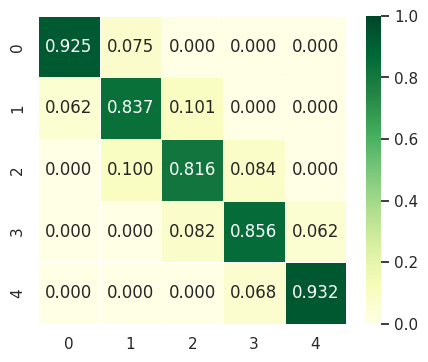

In [ ]:
#we use seaborn to create a heatmap
sns.set()

fig, ax = plt.subplots(figsize = (5,4))
im = sns.heatmap(sm.p, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True,  cmap="YlGn",fmt='.3f')

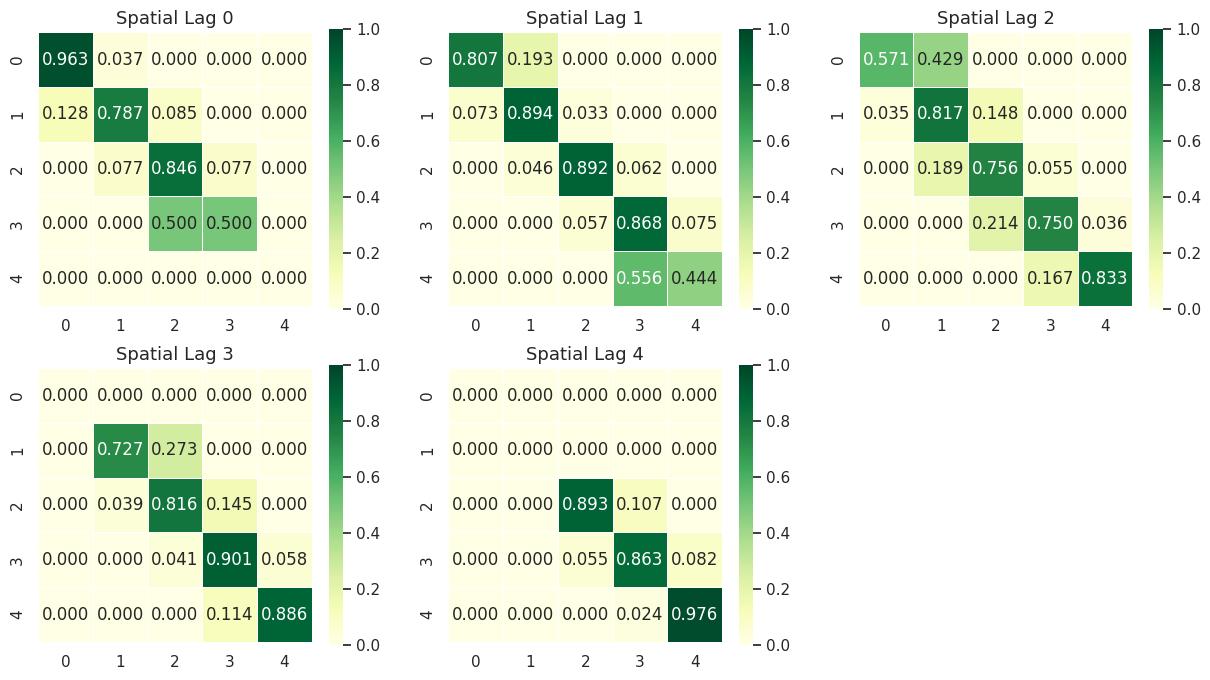

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (15,8))

for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if i==1 and j==2:
            ax.axis('off')
            continue
        p_temp = sm.P[i*3+j]
        im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
        ax.set_title("Spatial Lag %d"%(i*3+j),fontsize=13)

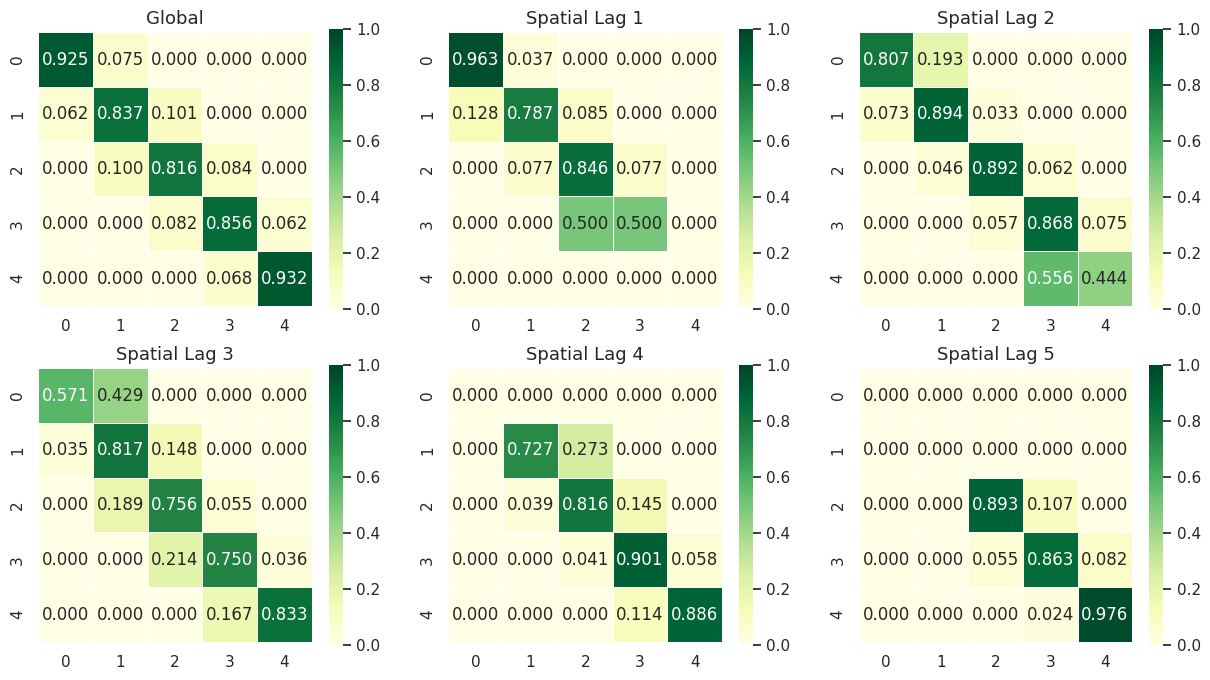

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (15,8))

for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if i==0 and j==0:
            im = sns.heatmap(sm.p, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
            ax.set_title("Global",fontsize=13)
        else:
            p_temp = sm.P[i*3+j-1]
            im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
            ax.set_title("Spatial Lag %d"%(i*3+j),fontsize=13)

The probability of a poor province remaining poor is 0.963 if their neighbours are in the 1st quintile and 0.81 if their neighbors are in the 2nd quintile. The probability of a rich economy remaining rich is 0.976 if their neighbors are in the 5th quintile, but if their neighbors are in the 4th quintile this drops to 0.886.

We can also explore the different steady state distributions implied by these different transition probabilities:

In [ ]:
print(sm.F)

ValueError: Input transition probability matrix has 1 rows full of 0s. Please set fill_empty_classes=True to set diagonal elements for these rows to be 1 to make sure the matrix is stochastic.

In [ ]:
giddy.markov.Homogeneity_Results(sm.T).summary()

--------------------------------------------------
             Markov Homogeneity Test              
--------------------------------------------------
Number of classes: 5
Number of transitions: 1539
Number of regimes: 5
Regime names: 0, 1, 2, 3, 4
--------------------------------------------------
   Test                   LR                Chi-2
  Stat.              113.021              141.710
    DOF                   27                   27
p-value                0.000                0.000
--------------------------------------------------
P(H0)        0        1        2        3        4
    0    0.925    0.075    0.000    0.000    0.000
    1    0.062    0.837    0.101    0.000    0.000
    2    0.000    0.100    0.816    0.084    0.000
    3    0.000    0.000    0.082    0.856    0.062
    4    0.000    0.000    0.000    0.068    0.932
--------------------------------------------------
P(0)         0        1        2        3        4
    0    0.963    0.037    0.000    0.0

In [ ]:
print(giddy.markov.kullback(sm.T))

{'Conditional homogeneity': np.float64(110.19153764345901), 'Conditional homogeneity dof': 80, 'Conditional homogeneity pvalue': np.float64(0.014246836668306506)}


## Beta convergence

In [ ]:
df_gdppc["log_2004"] = np.log(df_gdppc["gdppc_2004"])
df_gdppc["log_2023"] = np.log(df_gdppc["gdppc_2023"])

In [ ]:
df_gdppc['g_lg_2004_2023'] = df_gdppc['log_2023'] - df_gdppc['log_2004']

In [ ]:
df_gdppc.columns

Index(['asdf_id', 'shapeName', 'province', 'provinceID', 'subregion',
       'subregionID', 'region', 'regionID', 'gdppc_2004', 'gdppc_2005',
       'gdppc_2006', 'gdppc_2007', 'gdppc_2008', 'gdppc_2009', 'gdppc_2010',
       'gdppc_2011', 'gdppc_2012', 'gdppc_2013', 'gdppc_2014', 'gdppc_2015',
       'gdppc_2016', 'gdppc_2017', 'gdppc_2018', 'gdppc_2019', 'gdppc_2020',
       'gdppc_2021', 'gdppc_2022', 'gdppc_2023', 'log_2004', 'log_2023',
       'g_lg_2004_2023'],
      dtype='object')

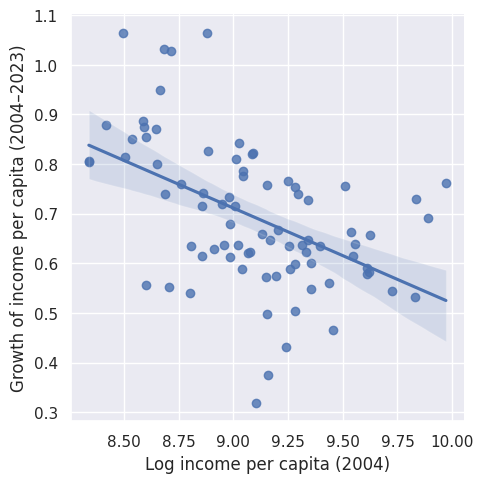

In [ ]:
sns.lmplot(
    x="log_2004",
    y="g_lg_2004_2023",
    data=df_gdppc
).set_axis_labels(
    "Log income per capita (2004)",
    "Growth of income per capita (2004–2023)"
)

In [ ]:
y = df_gdppc['g_lg_2004_2023']
X = df_gdppc['log_2004']
X_withconst = stats.add_constant(X)
ols_inv = stats.OLS(y, X_withconst).fit()
print(ols_inv.summary())

                            OLS Regression Results                            
Dep. Variable:         g_lg_2004_2023   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     25.34
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           2.95e-06
Time:                        14:03:16   Log-Likelihood:                 52.702
No. Observations:                  81   AIC:                            -101.4
Df Residuals:                      79   BIC:                            -96.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.347      7.030      0.0

The negative sign indicates β-convergence:

- Richer regions in 2004 grew more slowly over 2004–2023.

- A 1 unit increase in log initial income is associated with 0.1919 unit decrease in growth of log income.

This is the classic inverse relationship that supports convergence theory: initially poorer regions tend to catch up.

## Spatial Beta convergence

In [ ]:
w

In [ ]:
w.mean_neighbors, w.min_neighbors, w.max_neighbors

(np.float64(4.938271604938271), 1, 9)

In [ ]:
y = df_gdppc['g_lg_2004_2023'].values
y_name = 'Growth GDP per capita'
x = np.array([df_gdppc.log_2004]).T
x_name = 'Log GDP per capita in 2004'

In [ ]:
sar_gdp = ML_Lag(y=y, x=x, w=w,
          name_y=y_name, name_x = [x_name], name_w="w", name_ds='df_gdppc')
print(sar_gdp.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :    df_gdppc
Weights matrix      :           w
Dependent Variable  :Growth GDP per capita                Number of Observations:          81
Mean dependent var  :      0.6936                Number of Variables   :           3
S.D. dependent var  :      0.1460                Degrees of Freedom    :          78
Pseudo R-squared    :      0.2668
Spatial Pseudo R-squared:  0.2288
Log likelihood      :     53.6229
Sigma-square ML     :      0.0154                Akaike info criterion :    -101.246
S.E of regression   :      0.1242                Schwarz criterion     :     -94.063

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------

- **Beta Convergence Evidence**:

The coefficient of initial log GDP per capita is negative and significant, indicating that regions with higher initial GDP per capita in 2004 experienced lower subsequent growth.
This is evidence of Beta convergence: poorer regions catch up.

- **Spatial Dependence in Growth**:

W_Growth GDP per capita is not significant. The SAR model does not provide significant additional explanatory power in terms of neighbouring income levels influencing a focal region’s growth.

*However, this doesn't necessarily mean that spatial effects are irrelevant.*

Then how about SEM model?

In [ ]:
sem_gdp = ML_Error(y=y, x=x, w=w,
          name_y=y_name, name_x = [x_name], name_w="w", name_ds='df_gdppc')
print(sem_gdp.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :    df_gdppc
Weights matrix      :           w
Dependent Variable  :Growth GDP per capita                Number of Observations:          81
Mean dependent var  :      0.6936                Number of Variables   :           2
S.D. dependent var  :      0.1460                Degrees of Freedom    :          79
Pseudo R-squared    :      0.2429
Log likelihood      :     54.9379
Sigma-square ML     :      0.0147                Akaike info criterion :    -105.876
S.E of regression   :      0.1211                Schwarz criterion     :    -101.087

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         2.

/usr/local/lib/python3.12/dist-packages/spreg/ml_error.py:184: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  res = minimize_scalar(


- **Beta Convergence Evidence:**

The coefficient on initial log GDP per capita is −0.21708, highly significant.
As in the OLS and SAR model, this shows strong Beta convergence — poorer regions grow faster.

Note: the magnitude is larger than in the OLS and SAR model, meaning even stronger convergence is captured when correcting for spatial error.

- **Spatial Error Dependence:**

Lambda = 0.35085, positive and significant (p = 0.01177).
This implies unobserved spatial autocorrelation in the residuals.

There are omitted spatially structured variables influencing growth — e.g., shared infrastructure, local governance, geographic features.

The stronger (more negative) coefficient in SEM suggests that the true convergence effect is underestimated in OLS/SAR due to omitted spatially correlated factors. Once these are accounted for via the spatial error term, the convergence process appears more pronounced.